In [1]:
from Helper_functions import *
import numpy as np 
from sklearn import preprocessing
gpdf_wijken = wfs_data("https://geodata.nationaalgeoregister.nl/wijkenbuurten2019/wfs", "wijkenbuurten2019:cbs_wijken_2019")
#gpdf_gemeenten = wfs_data("https://geodata.nationaalgeoregister.nl/wijkenbuurten2019/wfs", "wijkenbuurten2019:gemeenten2019")


In [2]:
print(gpdf_wijken.columns)
#print(gpdf_gemeenten.columns)

Index(['id', 'wijkcode', 'jrstatcode', 'wijknaam', 'gemeentecode',
       'gemeentenaam', 'ind_wbi', 'water', 'omgevingsadressendichtheid',
       'stedelijkheid_adressen_per_km2',
       'bevolkingsdichtheid_inwoners_per_km2', 'aantal_inwoners', 'mannen',
       'vrouwen', 'percentage_personen_0_tot_15_jaar',
       'percentage_personen_15_tot_25_jaar',
       'percentage_personen_25_tot_45_jaar',
       'percentage_personen_65_jaar_en_ouder',
       'percentage_personen_45_tot_65_jaar', 'percentage_ongehuwd',
       'percentage_gehuwd', 'percentage_gescheid', 'percentage_verweduwd',
       'aantal_huishoudens', 'percentage_eenpersoonshuishoudens',
       'percentage_huishoudens_zonder_kinderen',
       'percentage_huishoudens_met_kinderen', 'gemiddelde_huishoudsgrootte',
       'percentage_westerse_migratieachtergrond',
       'percentage_niet_westerse_migratieachtergrond',
       'percentage_uit_marokko',
       'percentage_uit_nederlandse_antillen_en_aruba',
       'percentage_uit_

# Data Understanding

 - `BU_CODE`          = Buurtcode
 - `JRSTATCODE`       = Jaar van de buurt gegegevens + buurtcode
 - `BU_NAAM`          = Buurtnaam van desbetreffende buurt
 - `WK_CODE`          = Wijkcode die is toegekend aan een wijk  
 - `WK_NAAM`          = Wijknaam die is toegekend aan een wijk
 - `GM_CODE`          = Gemeentecode die is toegekend aan een gemeente
 - `GM_NAAM`          = Gemeentenaam die is toegekend aan een gemeente
 - `IND_WBI`          = Indelingswijziging wijken en buurten; Deze indicator geeft per wijk en buurt aan of de cijfers uit deze tabel zonder problemen kunnen worden gekoppeld aan en vergeleken met de cijfers van een jaar eerder, of dat er wijzigingen in de Wijk- en Buurtindeling zijn waardoor dit niet kan. 
 - `WATER`            = Een onderverdeling tussen land en grotere wateroppervlakten overeenkomend met het Bestand Bodemgebruik van het CBS. 
 - `POSTCODE`         = Postcode van de wijk
 - `DEK_PERC`         = Dekkingspercentage van omgeving
 - `OAD`              = Omgevingsadressendichtheid; Het gemiddeld aantal adressen van een buurt, wijk of gemeente per vierkante kilometer binnen een cirkel met een straal van één kilometer op 1 januari van het betreffende jaar.
 - `STED`             = Stedelijkheid; Op grond van de omgevingsadressendichtheid is aan iedere buurt, wijk of gemeente een stedelijkheidsklasse toegekend.                       
 De volgende klassenindeling is gehanteerd:
                       -  1. zeer sterk stedelijk ≥ 2 500 adressen per km2;
                       -  2. sterk stedelijk 1 500–2 500 adressen per km2;
                       -  3. matig stedelijk 1 000–1 500 adressen per km2;
                       -  4. weinig stedelijk 500–1 000 adressen per km2;
                       -  5. niet stedelijk < 500 adressen per km2.
 - `BEV_DICHTH`       = Bevolkingsdichtheid in desbetreffende wijk
 - `AANT_INW`         = Aantal inwoners in desbetreffende wijk
 - `AANT_MAN`         = Aantal mannen in desbetreffende wijk
 - `AANT_VROUW`       = Aantal vrouwen in desbetreffende wijk
 - `P_00_14_JR`       = Percentage inwoners van 0 t/m 14 jaar
 - `P_15_24_JR`       = Percentage inwoners van 15 t/m 24 jaar
 - `P_25_44_JR`       = Percentage inwoners van 25 t/m 64 jaar
 - `P_45_64_JR`       = Percentage inwoners van 45 t/m 64 jaar
 - `P_65_EO_JR`       = Percentage inwoners van 65 jaar en ouder
 - `P_ONGEHUWD`       = Percentage inwoners die ongehuwd is
 - `P_GEHUWD`         = Percentage inwoners die gehuwd is
 - `P_GESCHEID`       = Percentage inwoners die gescheiden is
 - `P_VERWEDUW`       = Percentage inwoners die verweduwed is
 - `AANTAL_HH`        = Het aantal particuliere huishoudens op 1 januari.
 - `P_EENP_HH`        = Eenpersoonshuishoudens; Het aantal huishoudens met één persoon, uitgedrukt in hele procenten van het totaal aantal particuliere huishoudens.
 - `P_HH_Z_K`         = Huishoudens zonder kinderen; Het aantal meerpersoonshuishoudens zonder kinderen uitgedrukt in hele procenten van het totaal aantal particuliere huishoudens
 - `P_HH_M_K`         = Huishoudens met kinderen; Het aantal meerpersoonshuishoudens met kinderen uitgedrukt in hele procenten van het totaal aantal particuliere huishoudens.
 - `GEM_HH_GR`        = Gemiddelde huishoudensgrootte;
Het aantal in particuliere huishoudens levende personen gedeeld door het aantal particuliere huishoudens. 

 - `P_WEST_AL`        = Westers totaal; Het aantal allochtonen met een westerse herkomst op 1 januari, uitgedrukt in hele procenten van het aantal inwoners. 
 - `P_N_W_AL`         = Niet-westers totaal; Het aantal allochtonen met een niet-westerse herkomst op 1 januari, uitgedrukt in hele procenten van het aantal inwoners. 
 - `P_MAROKKO`        = Marokko totaal uitgedrukt in procenten
 - `P_ANT_ARU`        = Nederlandse Antillen en Aruba; Het aandeel allochtonen met herkomstgroep van (voormalige) Nederlandse Antillen en Aruba op 1 januari, uitgedrukt in hele procenten van het aantal inwoners.
 - `P_SURINAM`        = Surinamers uitgedrukt in procenten
 - `P_TURKIJE`        = Turken uitgedrukt in procenten
 - `P_OVER_NW`        = Overig niet-westers; Het aandeel allochtonen met een overige niet-westerse herkomst op 1 januari, uitgedrukt in hele procenten van het aantal inwoners.
 - `OPP_TOT`          = Totale oppervlakte in ha
 - `OPP_LAND`         = Oppervlakte land in ha
 - `OPP_WATER`        = Oppervlakte water in ha
 - `geometry`         = afmetingen op aarde van desbetreffende omgeving


 -99999999 staat voor nullwaardes


In [3]:
gpdf_wijken.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3247 entries, 0 to 3246
Data columns (total 39 columns):
 #   Column                                              Non-Null Count  Dtype   
---  ------                                              --------------  -----   
 0   id                                                  3247 non-null   object  
 1   wijkcode                                            3247 non-null   object  
 2   jrstatcode                                          3247 non-null   object  
 3   wijknaam                                            3247 non-null   object  
 4   gemeentecode                                        3247 non-null   object  
 5   gemeentenaam                                        3247 non-null   object  
 6   ind_wbi                                             3247 non-null   int64   
 7   water                                               3247 non-null   object  
 8   omgevingsadressendichtheid                          3247 non

In [4]:
gpdf_wijken = gpdf_wijken.replace(-99999999, np.nan)
#gpdf_gemeenten = gpdf_gemeenten.replace(-99999999, np.nan)


In [5]:
test = gpdf_wijken['stedelijkheid_adressen_per_km2']
test2 = gpdf_wijken['bevolkingsdichtheid_inwoners_per_km2']
test.describe()


count    3161.000000
mean        3.698197
std         1.461757
min         1.000000
25%         2.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: stedelijkheid_adressen_per_km2, dtype: float64

# Construct data

Hieronder wordt er aan de hand van boolean values een selectie gemaakt in de data. Deze boolean values zijn representatief met user input van de front end. Voor nu wordt er nog geen rekening gehouden met classificatie. Er wordt echter wel een selecte gemaakt met daarin dat bijvoorbeeld kolom 'omgevingsadressendichtheid' en 'stedelijkheid_adressen_per_km2' betrekking hebben tot stedelijkheid. Met deze data wordt er één extra kolom gemaakt met daarbin de normalisatie waarde. 
Deze normalisatie waarde wordt later dan weer gebruikt om een weging te kunnen maken voor de user input. 
Hieronder een overzicht met welke kolommen worden meegenomen bij de user input en dus de normalisatie:

- `Stedelijkheid` worden de kolommen omgevingsadressendichtheid, stedelijkheid_adressen_per_km2 meegenomen
- `water` wordt de kolom oppervlakte_water_in_ha meegenomen
- `mensen` worden de kolommen aantal_inwoners, bevolkingsdichtheid_inwoners_per_km2 meegenomen 
- `kinderen` worden de kolommen aantal_inwoners, percentage_personen_0_tot_15_jaar meegenomen
- `senioren` worden de kolommen aantal_inwoners, percentage_personen_65_jaar_en_ouder meegenomen 




In [6]:
gpdf_wijken_backup = gpdf_wijken

stedelijkheid = True
water = True
mensen = True 
kinderen = True 
senioren = True

if stedelijkheid == True:
    # Normalisatie waarde aanmaken voor 'omgevingsadressendichtheid'
    x = gpdf_wijken[['omgevingsadressendichtheid']]
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    gpdf_wijken['omgevingsadressendichtheid_genormaliseerd'] = pd.DataFrame(x_scaled)

    # Normalisatie waarde aanmaken voor stedelijkheid_adressen_per_km2
    x = gpdf_wijken[['stedelijkheid_adressen_per_km2']]
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    gpdf_wijken['stedelijkheid_adressen_per_km2_genormaliseerd'] = pd.DataFrame(x_scaled)

    # Maken van vertaling naar één normalisatie waarde in een kolom 'stedelijkheid_normalisatie_waarde'
    gpdf_wijken['stedelijkheid_normalisatie_waarde'] = gpdf_wijken['omgevingsadressendichtheid_genormaliseerd'] + gpdf_wijken['stedelijkheid_adressen_per_km2_genormaliseerd']

    # Verwijderen van overbodige kolommen
    gpdf_wijken.drop(columns=['omgevingsadressendichtheid_genormaliseerd','stedelijkheid_adressen_per_km2_genormaliseerd'], axis=1, inplace=True)

    #KLASSE KOLOM MAKEN OP BASIS VAN KWARTIELEN VAN NORMALISATIE WAARDE
    dataframe_kolom = gpdf_wijken["stedelijkheid_normalisatie_waarde"]
    q25 = dataframe_kolom.quantile(q=.25)
    q50 = dataframe_kolom.quantile(q=.5)
    q75 = dataframe_kolom.quantile(q=.75)

    # Gebruik de aantallen die bij vg_data.describe() staan
    m1 = dataframe_kolom < q25
    m2 = np.logical_and(dataframe_kolom >  q25, dataframe_kolom < q50)
    m3 = np.logical_and(dataframe_kolom >  q50, dataframe_kolom < q75)
    m4 = dataframe_kolom > q75

    gpdf_wijken['klasse_stedelijkheid_normalisatie'] = np.select([m1,m2,m3,m4], ['Laag','Middel','Middel-Hoog','Hoog'], default='Geen')

# -----------------------------------------------------------------------------------------------------

if mensen == True:
    # Normalisatie waarde aanmaken voor 'omgevingsadressendichtheid'
    x = gpdf_wijken[['aantal_inwoners']]
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    gpdf_wijken['aantal_inwoners_genormaliseerd'] = pd.DataFrame(x_scaled)
    
    # Normalisatie waarde aanmaken voor stedelijkheid_adressen_per_km2
    x = gpdf_wijken[['bevolkingsdichtheid_inwoners_per_km2']]
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    gpdf_wijken['bevolkingsdichtheid_inwoners_per_km2_genormaliseerd'] = pd.DataFrame(x_scaled)

    # Maken van vertaling naar één normalisatie waarde in een kolom 'stedelijkheid_normalisatie_waarde'
    gpdf_wijken['mensen_normalisatie_waarde'] = gpdf_wijken['aantal_inwoners_genormaliseerd'] + gpdf_wijken['bevolkingsdichtheid_inwoners_per_km2_genormaliseerd']

    # Verwijderen van overbodige kolommen
    gpdf_wijken.drop(columns=['aantal_inwoners_genormaliseerd','bevolkingsdichtheid_inwoners_per_km2_genormaliseerd'], axis=1, inplace=True)

    #KLASSE KOLOM MAKEN OP BASIS VAN KWARTIELEN VAN NORMALISATIE WAARDE
    dataframe_kolom = gpdf_wijken["mensen_normalisatie_waarde"]
    q25 = dataframe_kolom.quantile(q=.25)
    q50 = dataframe_kolom.quantile(q=.5)
    q75 = dataframe_kolom.quantile(q=.75)

    # Gebruik de aantallen die bij vg_data.describe() staan
    m1 = dataframe_kolom < q25
    m2 = np.logical_and(dataframe_kolom > q25, dataframe_kolom < q50)
    m3 = np.logical_and(dataframe_kolom > q50, dataframe_kolom < q75)
    m4 = dataframe_kolom > q75

    gpdf_wijken['klasse_mensen_normalisatie'] = np.select([m1,m2,m3,m4], ['Laag','Middel','Middel-Hoog','Hoog'], default='Geen')

# -----------------------------------------------------------------------------------------------------

if kinderen == True:
    # Normalisatie waarde aanmaken voor 'omgevingsadressendichtheid'
    gpdf_wijken['kinderen_berekening'] = gpdf_wijken['percentage_personen_0_tot_15_jaar'] / 100
    gpdf_wijken['aantal_kinderen_in_wijk'] = gpdf_wijken['aantal_inwoners'] * gpdf_wijken['kinderen_berekening']
    gpdf_wijken['aantal_kinderen_in_wijk'] = gpdf_wijken['aantal_kinderen_in_wijk'].apply(np.floor)

    x = gpdf_wijken[['aantal_kinderen_in_wijk']]
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    gpdf_wijken['kinderen_normalisatie_waarde'] = pd.DataFrame(x_scaled)

    gpdf_wijken.drop(columns=['kinderen_berekening', 'aantal_kinderen_in_wijk'], axis=1, inplace=True)

    #KLASSE KOLOM MAKEN OP BASIS VAN KWARTIELEN VAN NORMALISATIE WAARDE
    dataframe_kolom = gpdf_wijken["kinderen_normalisatie_waarde"]
    q25 = dataframe_kolom.quantile(q=.25)
    q50 = dataframe_kolom.quantile(q=.5)
    q75 = dataframe_kolom.quantile(q=.75)

    # Gebruik de aantallen die bij vg_data.describe() staan
    m1 = dataframe_kolom < q25
    m2 = np.logical_and(dataframe_kolom >  q25, dataframe_kolom < q50)
    m3 = np.logical_and(dataframe_kolom >  q50, dataframe_kolom < q75)
    m4 = dataframe_kolom > q75

    gpdf_wijken['klasse_kinderen_normalisatie'] = np.select([m1,m2,m3,m4], ['Laag','Middel','Middel-Hoog','Hoog'], default='Geen')

# -----------------------------------------------------------------------------------------------------

if senioren == True:
    # Normalisatie waarde aanmaken voor 'omgevingsadressendichtheid'
    gpdf_wijken['senioren_berekening'] = gpdf_wijken['percentage_personen_65_jaar_en_ouder'] / 100
    gpdf_wijken['aantal_senioren_in_wijk'] = gpdf_wijken['aantal_inwoners'] * gpdf_wijken['senioren_berekening']
    gpdf_wijken['aantal_senioren_in_wijk'] = gpdf_wijken['aantal_senioren_in_wijk'].apply(np.floor)

    x = gpdf_wijken[['aantal_senioren_in_wijk']]
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    gpdf_wijken['senioren_normalisatie_waarde'] = pd.DataFrame(x_scaled)

    gpdf_wijken.drop(columns=['senioren_berekening', 'aantal_senioren_in_wijk'], axis=1, inplace=True)

    #KLASSE KOLOM MAKEN OP BASIS VAN KWARTIELEN VAN NORMALISATIE WAARDE
    dataframe_kolom = gpdf_wijken["senioren_normalisatie_waarde"]
    q25 = dataframe_kolom.quantile(q=.25)
    q50 = dataframe_kolom.quantile(q=.5)
    q75 = dataframe_kolom.quantile(q=.75)

    # Gebruik de aantallen die bij vg_data.describe() staan
    m1 = dataframe_kolom < q25
    m2 = np.logical_and(dataframe_kolom >  q25, dataframe_kolom < q50)
    m3 = np.logical_and(dataframe_kolom >  q50, dataframe_kolom < q75)
    m4 = dataframe_kolom > q75

    gpdf_wijken['klasse_senioren_normalisatie'] = np.select([m1,m2,m3,m4], ['Laag','Middel','Middel-Hoog','Hoog'], default='Geen')

# -----------------------------------------------------------------------------------------------------

if water == True:
    # Normalisatie waarde aanmaken voor 'omgevingsadressendichtheid'
    x = gpdf_wijken[['oppervlakte_water_in_ha']]
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    gpdf_wijken['water_normalisatie_waarde'] = pd.DataFrame(x_scaled)

    #KLASSE KOLOM MAKEN OP BASIS VAN KWARTIELEN VAN NORMALISATIE WAARDE
    dataframe_kolom = gpdf_wijken["water_normalisatie_waarde"]
    q25 = dataframe_kolom.quantile(q=.25)
    q50 = dataframe_kolom.quantile(q=.5)
    q75 = dataframe_kolom.quantile(q=.75)

    # Gebruik de aantallen die bij vg_data.describe() staan
    m1 = dataframe_kolom < q25
    m2 = np.logical_and(dataframe_kolom >  q25, dataframe_kolom < q50)
    m3 = np.logical_and(dataframe_kolom >  q50, dataframe_kolom < q75)
    m4 = dataframe_kolom > q75

    gpdf_wijken['klasse_water_normalisatie'] = np.select([m1,m2,m3,m4], ['Laag','Middel','Middel-Hoog','Hoog'], default='Geen')

gpdf_wijken


,id,wijkcode,jrstatcode,wijknaam,gemeentecode,gemeentenaam,ind_wbi,water,omgevingsadressendichtheid,stedelijkheid_adressen_per_km2,...,stedelijkheid_normalisatie_waarde,klasse_stedelijkheid_normalisatie,mensen_normalisatie_waarde,klasse_mensen_normalisatie,kinderen_normalisatie_waarde,klasse_kinderen_normalisatie,senioren_normalisatie_waarde,klasse_senioren_normalisatie,water_normalisatie_waarde,klasse_water_normalisatie
0,cbs_wijken_2019.0,WK000300,2019WK000300,Wijk 00,GM0003,Appingedam,1.0,NEE,1067.0,3.0,...,0.588046,Middel,0.124743,Middel-Hoog,0.089393,Hoog,0.103703,Hoog,0.016587,Hoog
1,cbs_wijken_2019.1,WK001001,2019WK001001,Centrum,GM0010,Delfzijl,3.0,NEE,963.0,4.0,...,0.829448,Middel-Hoog,0.110214,Middel-Hoog,0.001170,Laag,0.005728,Laag,0.000207,Laag
2,cbs_wijken_2019.115,WK009300,2019WK009300,Wijk 00 West-Terschelling,GM0093,Terschelling,1.0,NEE,366.0,5.0,...,1.030093,Hoog,0.027145,Middel,0.013068,Middel,0.018839,Middel,0.006842,Middel-Hoog
3,cbs_wijken_2019.1248,WK048911,2019WK048911,Wijk 11 Bijdorp,GM0489,Barendrecht,1.0,NEE,1485.0,3.0,...,0.622603,Middel,0.208831,Hoog,0.013678,Middel,0.015325,Middel,0.000000,Laag
4,cbs_wijken_2019.2,WK001002,2019WK001002,West,GM0010,Delfzijl,3.0,NEE,1203.0,3.0,...,0.599289,Middel,0.113740,Middel-Hoog,0.021357,Middel,0.026782,Middel,0.001451,Middel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3242,cbs_wijken_2019.3229,WK169599,2019WK169599,Groot water,GM1695,Noord-Beveland,NaN,JA,NaN,NaN,...,NaN,Geen,NaN,Geen,NaN,Geen,NaN,Geen,NaN,Geen
3243,cbs_wijken_2019.3230,WK170899,2019WK170899,Groot water,GM1708,Steenwijkerland,NaN,JA,NaN,NaN,...,NaN,Geen,NaN,Geen,NaN,Geen,NaN,Geen,NaN,Geen
3244,cbs_wijken_2019.3231,WK170999,2019WK170999,Groot water,GM1709,Moerdijk,NaN,JA,NaN,NaN,...,NaN,Geen,NaN,Geen,NaN,Geen,NaN,Geen,NaN,Geen
3245,cbs_wijken_2019.3245,WK196999,2019WK196999,Groot water,GM1969,Westerkwartier,NaN,JA,NaN,NaN,...,NaN,Geen,NaN,Geen,NaN,Geen,NaN,Geen,NaN,Geen


In [7]:
Dataframe_demografie = gpdf_wijken

Dataframe_demografie = gpdf_wijken[['wijkcode', 'wijknaam','gemeentenaam','water','omgevingsadressendichtheid','stedelijkheid_adressen_per_km2', 'bevolkingsdichtheid_inwoners_per_km2', 'aantal_inwoners', 'mannen',
       'vrouwen', 'percentage_personen_0_tot_15_jaar',
       'percentage_personen_15_tot_25_jaar',
       'percentage_personen_25_tot_45_jaar',
       'percentage_personen_65_jaar_en_ouder',
       'percentage_personen_45_tot_65_jaar', 'percentage_ongehuwd',
       'percentage_gehuwd', 'percentage_gescheid','aantal_huishoudens', 'percentage_eenpersoonshuishoudens',
       'percentage_huishoudens_zonder_kinderen',
       'percentage_huishoudens_met_kinderen', 'gemiddelde_huishoudsgrootte','oppervlakte_totaal_in_ha', 'oppervlakte_land_in_ha',
       'oppervlakte_water_in_ha']]

def DemografieAPI(wijk):
    df = Dataframe_demografie.loc[Dataframe_demografie['wijkcode'] == wijk]
    return df



# Samenvatting dataset

Je kan deze dataset gebruiken voor het beschrijvende statistieken gedeelte maar ook voor het formulier.
De waardes die hierboven in het vorige tekst vakje staat vermeld zijn genormaliseerd en staan in een kolom binnen de dataframe. Hieraan is nog een kolom toegevoegd met een bepaalde klasse. 

Deze klasse is gebasseerd op de kwartielen van de normalisatie waardes. Dit kan worden gebruikt voor wegingen afhankelijk van de user input. 

# Uitwerken van voorspelling methode

In [25]:
df_voorspelling = gpdf_wijken[['id', 'wijkcode', 'jrstatcode', 'wijknaam', 'gemeentecode',
       'gemeentenaam', 'ind_wbi', 'water', 'omgevingsadressendichtheid',
       'stedelijkheid_adressen_per_km2',
       'bevolkingsdichtheid_inwoners_per_km2', 'aantal_inwoners', 'mannen',
       'vrouwen', 'percentage_personen_0_tot_15_jaar',
       'percentage_personen_15_tot_25_jaar',
       'percentage_personen_25_tot_45_jaar',
       'percentage_personen_65_jaar_en_ouder',
       'percentage_personen_45_tot_65_jaar', 'percentage_ongehuwd',
       'percentage_gehuwd', 'percentage_gescheid', 'percentage_verweduwd',
       'aantal_huishoudens', 'percentage_eenpersoonshuishoudens',
       'percentage_huishoudens_zonder_kinderen',
       'percentage_huishoudens_met_kinderen', 'gemiddelde_huishoudsgrootte',
       'percentage_westerse_migratieachtergrond',
       'percentage_niet_westerse_migratieachtergrond',
       'percentage_uit_marokko',
       'percentage_uit_nederlandse_antillen_en_aruba',
       'percentage_uit_suriname', 'percentage_uit_turkije',
       'percentage_overige_nietwestersemigratieachtergrond',
       'oppervlakte_totaal_in_ha', 'oppervlakte_land_in_ha',
       'oppervlakte_water_in_ha']]
    

In [27]:
df_voorspelling_zonder_nan = df_voorspelling.dropna()
df_voorspelling_zonder_nan = df_voorspelling_zonder_nan.reset_index(drop=True)


,id,wijkcode,jrstatcode,wijknaam,gemeentecode,gemeentenaam,ind_wbi,water,omgevingsadressendichtheid,stedelijkheid_adressen_per_km2,...,percentage_westerse_migratieachtergrond,percentage_niet_westerse_migratieachtergrond,percentage_uit_marokko,percentage_uit_nederlandse_antillen_en_aruba,percentage_uit_suriname,percentage_uit_turkije,percentage_overige_nietwestersemigratieachtergrond,oppervlakte_totaal_in_ha,oppervlakte_land_in_ha,oppervlakte_water_in_ha
0,cbs_wijken_2019.0,WK000300,2019WK000300,Wijk 00,GM0003,Appingedam,1.0,NEE,1067.0,3.0,...,7.0,7.0,0.0,1.0,1.0,2.0,3.0,2458.0,2378.0,80.0
1,cbs_wijken_2019.1,WK001001,2019WK001001,Centrum,GM0010,Delfzijl,3.0,NEE,963.0,4.0,...,10.0,11.0,0.0,4.0,1.0,2.0,4.0,29.0,27.0,1.0
2,cbs_wijken_2019.115,WK009300,2019WK009300,Wijk 00 West-Terschelling,GM0093,Terschelling,1.0,NEE,366.0,5.0,...,6.0,2.0,0.0,1.0,0.0,0.0,1.0,2527.0,2494.0,33.0
3,cbs_wijken_2019.1248,WK048911,2019WK048911,Wijk 11 Bijdorp,GM0489,Barendrecht,1.0,NEE,1485.0,3.0,...,7.0,6.0,0.0,1.0,2.0,0.0,3.0,27.0,27.0,0.0
4,cbs_wijken_2019.2,WK001002,2019WK001002,West,GM0010,Delfzijl,3.0,NEE,1203.0,3.0,...,7.0,4.0,0.0,1.0,1.0,1.0,1.0,160.0,152.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2675,cbs_wijken_2019.3153,WK197810,2019WK197810,Wijk10-Langerak,GM1978,Molenlanden,3.0,NEE,304.0,5.0,...,4.0,5.0,1.0,0.0,0.0,0.0,4.0,1119.0,1045.0,74.0
2676,cbs_wijken_2019.3154,WK197811,2019WK197811,Wijk11-Molenaarsgraaf,GM1978,Molenlanden,3.0,NEE,193.0,5.0,...,3.0,1.0,0.0,0.0,1.0,0.0,0.0,788.0,757.0,31.0
2677,cbs_wijken_2019.3155,WK197812,2019WK197812,Wijk12-Nieuw-Lekkerland,GM1978,Molenlanden,3.0,NEE,823.0,4.0,...,4.0,3.0,0.0,0.0,0.0,0.0,2.0,979.0,875.0,104.0
2678,cbs_wijken_2019.3160,WK197817,2019WK197817,Wijk17-Schelluinen,GM1978,Molenlanden,3.0,NEE,166.0,5.0,...,7.0,4.0,1.0,0.0,0.0,0.0,2.0,358.0,351.0,7.0


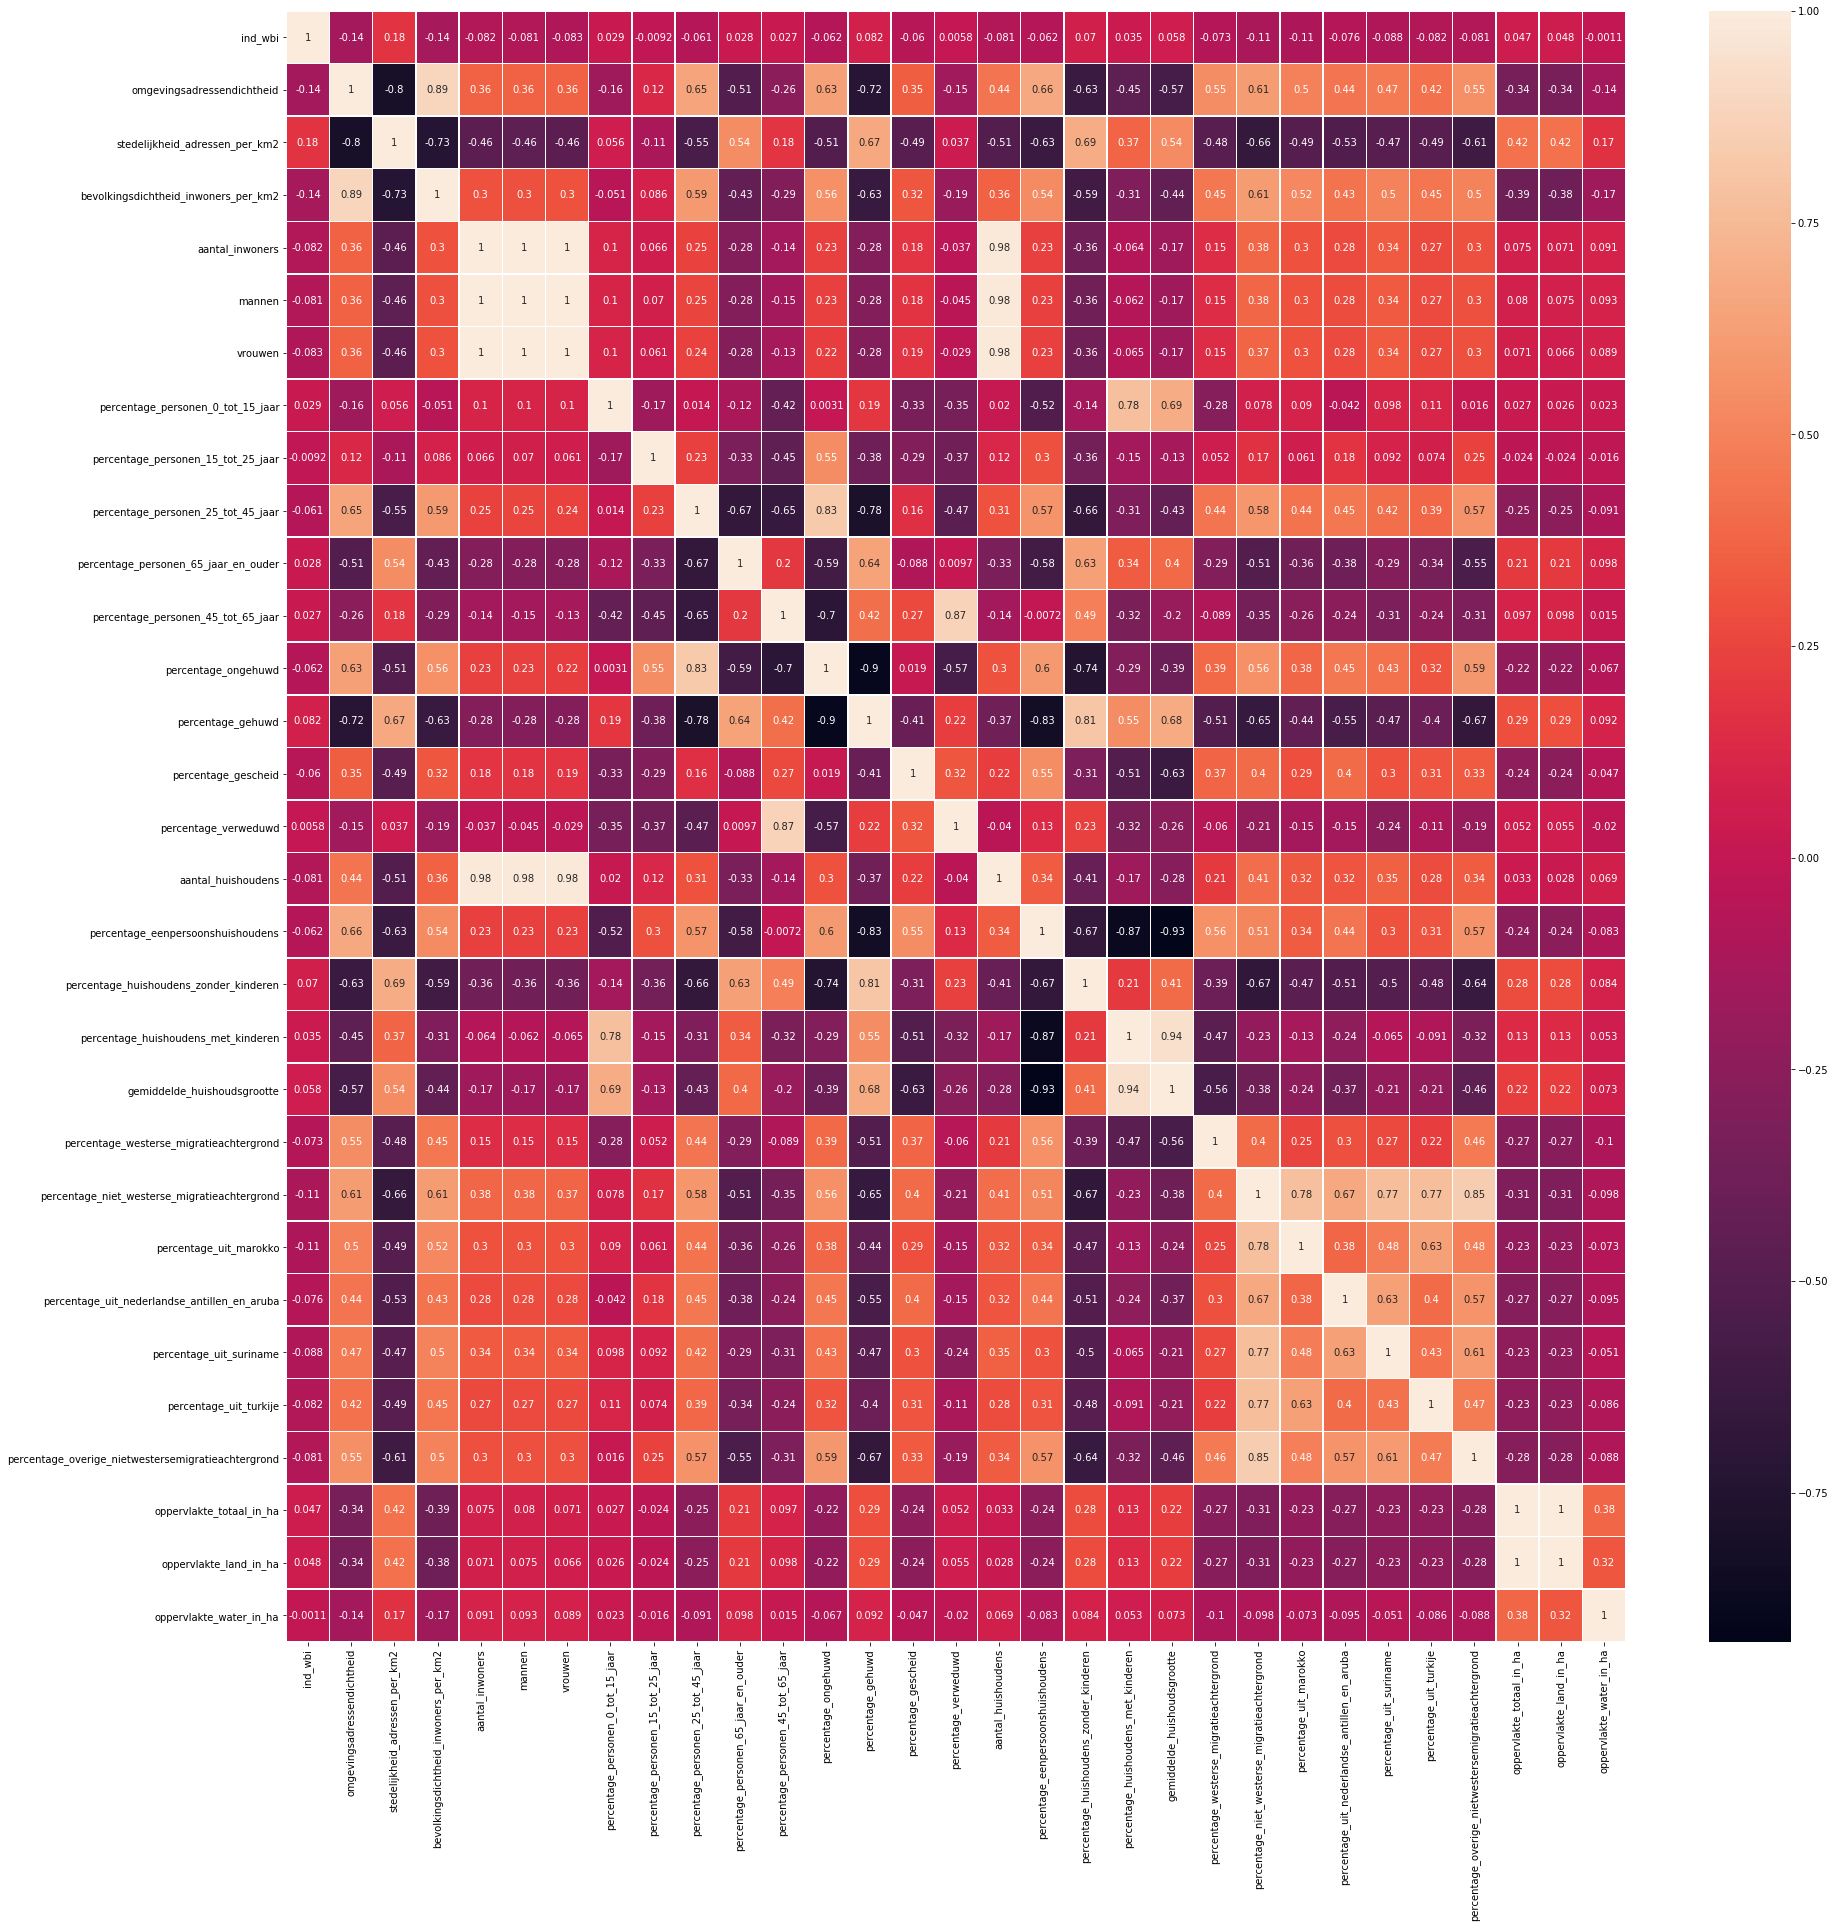

In [29]:
import seaborn as sns
correlatie = df_voorspelling_zonder_nan.corr()
fig, ax = plt.subplots(figsize=(30,30))         # Sample figsize in inches
sns.heatmap(correlatie, annot=True, linewidths=.5, ax=ax)



In [10]:
correlatie.drop(columns=['oppervlakte_water_in_ha', 'oppervlakte_land_in_ha', 'oppervlakte_totaal_in_ha', 'percentage_uit_turkije','percentage_uit_suriname', 'percentage_uit_nederlandse_antillen_en_aruba', 'percentage_uit_marokko', 'percentage_personen_15_tot_25_jaar', 'ind_wbi'], inplace=True)
correlatie.drop(index=['oppervlakte_water_in_ha', 'oppervlakte_land_in_ha', 'oppervlakte_totaal_in_ha', 'percentage_uit_turkije','percentage_uit_suriname', 'percentage_uit_nederlandse_antillen_en_aruba', 'percentage_uit_marokko', 'percentage_personen_15_tot_25_jaar', 'ind_wbi'], inplace=True)


In [14]:

print(correlatie.columns)

Index(['id', 'wijkcode', 'jrstatcode', 'wijknaam', 'gemeentecode',
       'gemeentenaam', 'ind_wbi', 'water', 'omgevingsadressendichtheid',
       'stedelijkheid_adressen_per_km2',
       'bevolkingsdichtheid_inwoners_per_km2', 'aantal_inwoners', 'mannen',
       'vrouwen', 'percentage_personen_0_tot_15_jaar',
       'percentage_personen_15_tot_25_jaar',
       'percentage_personen_25_tot_45_jaar',
       'percentage_personen_65_jaar_en_ouder',
       'percentage_personen_45_tot_65_jaar', 'percentage_ongehuwd',
       'percentage_gehuwd', 'percentage_gescheid', 'percentage_verweduwd',
       'aantal_huishoudens', 'percentage_eenpersoonshuishoudens',
       'percentage_huishoudens_zonder_kinderen',
       'percentage_huishoudens_met_kinderen', 'gemiddelde_huishoudsgrootte',
       'percentage_westerse_migratieachtergrond',
       'percentage_niet_westerse_migratieachtergrond',
       'percentage_uit_marokko',
       'percentage_uit_nederlandse_antillen_en_aruba',
       'percentage_uit_

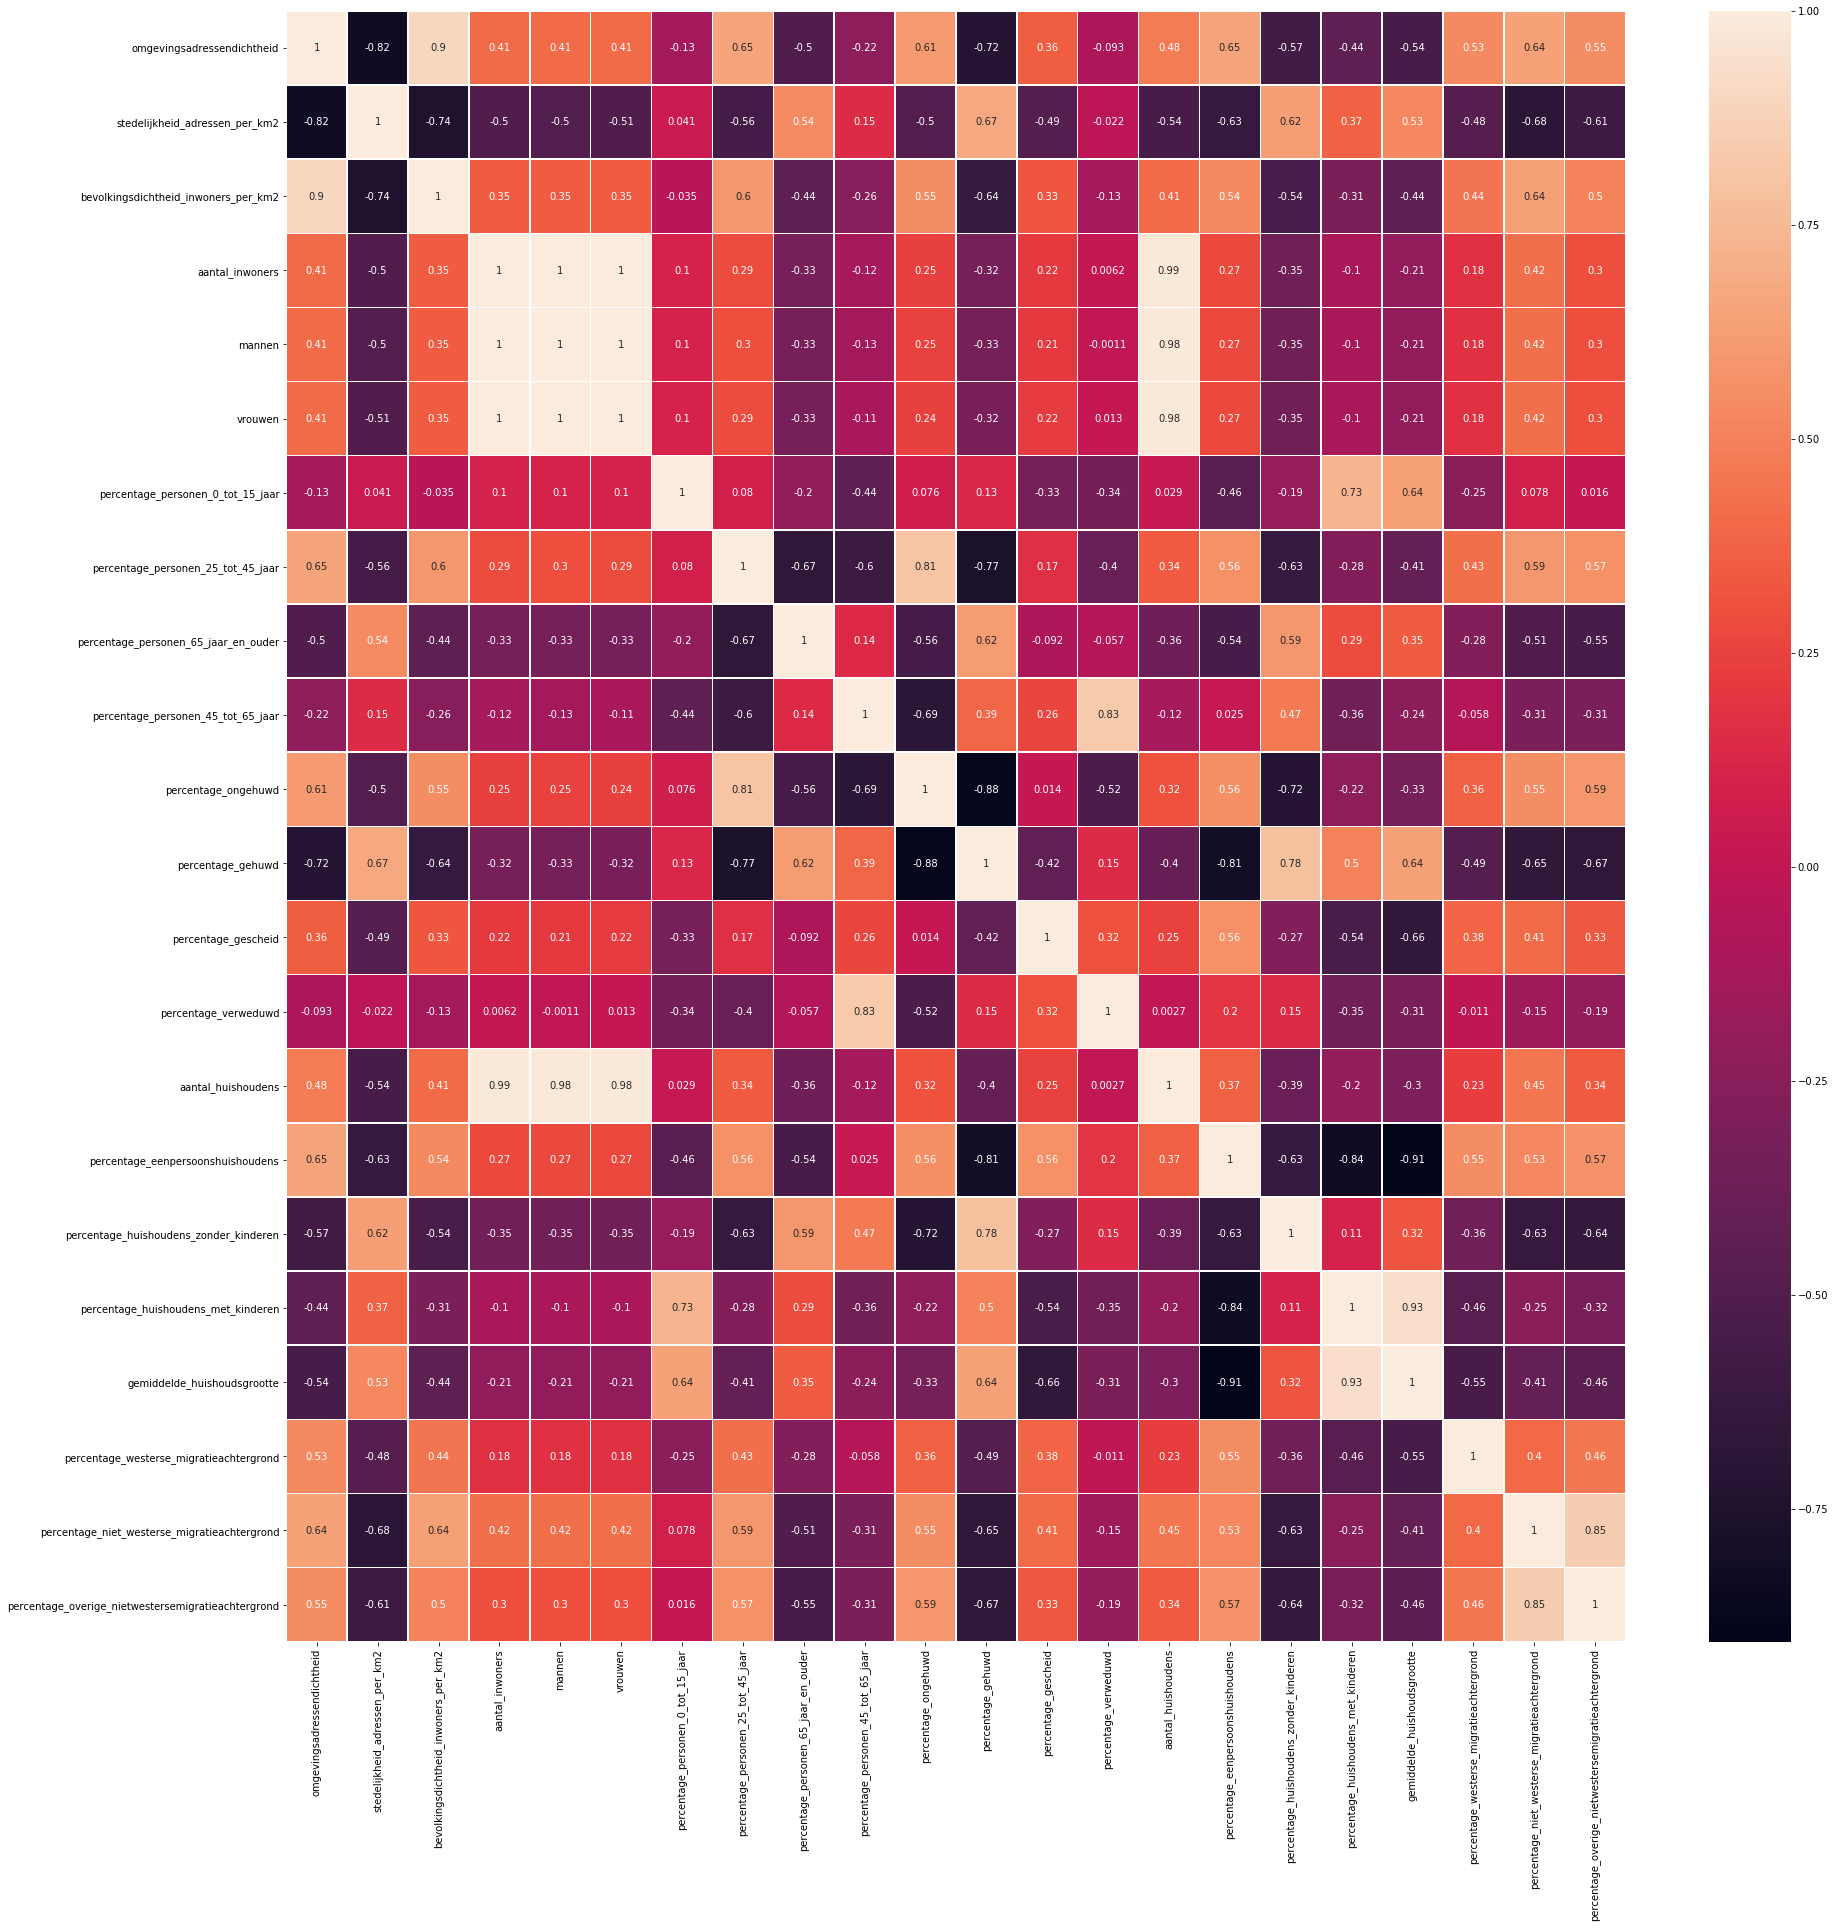

In [12]:
fig, ax = plt.subplots(figsize=(30,30))         # Sample figsize in inches
sns.heatmap(correlatie, annot=True, linewidths=.5, ax=ax)

## Uitslag van correlatie

### omgevingsadressendichtheid
- percentage_eenpersoonhuishoudens: 0.65
- percentage_gehuwd: -0.72
- percentage_25_tot_45_jaar: 0.65
- bevolkingsdichtheid_inwoners_per_km2: 0.9
- stedelijkheid_adressen_per_km2: -0.82

### stedelijkheid_adressen_per_km2
- percentage_niet_westerse_migratieachtergrond: -0.68
- percentage_gehuwd: 0.67
- bevolkingsdichtheid_inwoners_per_km2: -0.74
- omgevingsadressendichtheid: -0.82

### bevolkingsdichtheid_inwoners_per_km2
- stedelijkheid_adressen_per_km2: -0.74
- omgevingsadressendichtheid: 0.9 

### aantal_inwoners
- aantal_huishoudens: 0.99
- vrouwen: 1
- mannen: 1

### mannen
- aantal_huishoudens: 0.98
- aantal_inwoners: 1
- vrouwen: 1

### vrouwen
- aantal_huishoudens: 1
- mannen: 1

### percentage_personen_0_tot_15_jaar
- percentage_huishouden_met_kinderen: 0.73

### percentage_personen_25_tot_45_jaar
- percentage_gehuwd: -0.77
- percentage_ongehuwd: 0.81

### percentage_personen_45_tot_65_jaar:
- percentage_verweduwd: 0.83
- percentage_ongehuwd: -0.69

### percentage_personen_65_jaar_en_ouder
- percentage_personen_25_tot_45_jaar: -0.67
- percentage_gehuwd: 0.62

### percentage_ongehuwd
- percentage_huishoudens_zonder_kinderen: -0.72
- percentage_gehuwd: -0.88
- percentage_personen_45_tot_65_jaar: -0.69
- percentage_personen_25_tot_45_jaar: 0.81
 
### percentage_gehuwd
- percentage_overige__nietwestersemigratieachtergrond: -0.67
- percentage_huishoudens_zonder_kinderen: 0.78
- percentage_eenpersoonhuishoudens: -0.81
- percentage_ongehuwd: -0.88
- percentage_personen_25_tot_45_jaar: -0.77
- omgevingsadressendichtheid: -0.72

### percentage_gescheid
- gemiddelde_huishoudgrootte: -0.67


### percentage_verweduwd
- percentage_personen_45_tot_65_jaar: 0.83


### aantal_huishoudens
- aantal_inwoners: 0.99
- mannen: 0.98
- vrouwen: 0.97
 
### percentage_eenpersoonhuishoudens
- gemiddelde_huishoudgrootte: -0.91
- percentage_huishoudens_met_kinderen: -0.84
- percentage_ongehuwd: -0.81

### percentage_huishoudens_zonder_kinderen
- percentage_gehuwd: 0.78
- percentage_ongehuwd: -0.72
- percentage_personen_25_tot_45_jaar: -0.63

###percentage_huishoudens_met_kinderen
- gemiddelde_huishoudgrootte: 0.93
- percentage_eenpersoonhuishoudens: -0.84

### gemiddelde_huishoudgrootte
- percentage_huishoudens_met_kinderen: 0.93
- percentage_eenpersoonhuishoudens: -0.91
- percentage_gescheid: -0.66

### percentage_niet_westerse_migratieachtergrond
- percentage_overige__nietwestersemigratieachtergrond: 0.85
- stedelijkheid_adressen_per_km2: -0.68

### percentage_overige__nietwestersemigratieachtergrond
- percentage_niet_westerse_migratieachtergrond: 0.85
- percentage_gehuwd: -0.67






In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#omgevingsadressendichtheid
# indep_vars = df_voorspelling_zonder_nan[['percentage_eenpersoonshuishoudens', 'percentage_personen_25_tot_45_jaar','bevolkingsdichtheid_inwoners_per_km2','stedelijkheid_adressen_per_km2']]
# x_omgevingsadressendichtheid = df_voorspelling_zonder_nan['omgevingsadressendichtheid']

# indep_vars_train, indep_vars_test, x_omgevingsadressendichtheid_train, x_omgevingsadressendichtheid_test = train_test_split(indep_vars, df_voorspelling_zonder_nan['omgevingsadressendichtheid'], test_size=0.3, random_state = 42)

# def LineaireRegressie(indep_vars, naam):
#     model = LinearRegression().fit(indep_vars_train[indep_vars], x_omgevingsadressendichtheid_train)
#     print('gegevens voor regressie: ', naam )
#     print(model.intercept_, model.coef_)
#     print(model.score(indep_vars_test[indep_vars], x_omgevingsadressendichtheid_test))
#     return model

# LineaireRegressie(['percentage_eenpersoonshuishoudens', 'percentage_personen_25_tot_45_jaar','bevolkingsdichtheid_inwoners_per_km2','stedelijkheid_adressen_per_km2'], 'omgevingsadressendichtheid\n')






gegevens voor regressie:  omgevingsadressendichtheid

288.8483225685743 [  19.28075853   20.95417817    0.26996544 -221.07975428]
0.8582899822203625


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [110]:
def CompleteRegressie(x, y, naam):
    y_train, y_test, x_train, x_test = train_test_split(y, x, test_size=0.3, random_state = 42)
    model = LinearRegression().fit(y_train, x_train)
    print('gegevens voor regressie: ', naam)
    print(model.intercept_, model.coef_)
    print(model.score(y_test, x_test))
    return model

y = df_voorspelling_zonder_nan[['percentage_niet_westerse_migratieachtergrond', 'percentage_gehuwd','bevolkingsdichtheid_inwoners_per_km2','omgevingsadressendichtheid']]
x = df_voorspelling_zonder_nan['stedelijkheid_adressen_per_km2']

CompleteRegressie(x, y, 'stedelijkheid\n')

In [70]:
#voorbeeld voor het uitvoeren van een predict
# test = LineaireRegressie(['percentage_eenpersoonshuishoudens', 'percentage_personen_25_tot_45_jaar','bevolkingsdichtheid_inwoners_per_km2','stedelijkheid_adressen_per_km2'])
# uitkomst = test.predict(np.array([[24, 23, 160, 5]]))
# uitkomst

288.8483225685743 [  19.28075853   20.95417817    0.26996544 -221.07975428]
0.8582899822203625


array([171.32832381])

In [48]:
df_voorspelling_zonder_nan

,id,wijkcode,jrstatcode,wijknaam,gemeentecode,gemeentenaam,ind_wbi,water,omgevingsadressendichtheid,stedelijkheid_adressen_per_km2,...,percentage_westerse_migratieachtergrond,percentage_niet_westerse_migratieachtergrond,percentage_uit_marokko,percentage_uit_nederlandse_antillen_en_aruba,percentage_uit_suriname,percentage_uit_turkije,percentage_overige_nietwestersemigratieachtergrond,oppervlakte_totaal_in_ha,oppervlakte_land_in_ha,oppervlakte_water_in_ha
0,cbs_wijken_2019.0,WK000300,2019WK000300,Wijk 00,GM0003,Appingedam,1.0,NEE,1067.0,3.0,...,7.0,7.0,0.0,1.0,1.0,2.0,3.0,2458.0,2378.0,80.0
1,cbs_wijken_2019.1,WK001001,2019WK001001,Centrum,GM0010,Delfzijl,3.0,NEE,963.0,4.0,...,10.0,11.0,0.0,4.0,1.0,2.0,4.0,29.0,27.0,1.0
2,cbs_wijken_2019.115,WK009300,2019WK009300,Wijk 00 West-Terschelling,GM0093,Terschelling,1.0,NEE,366.0,5.0,...,6.0,2.0,0.0,1.0,0.0,0.0,1.0,2527.0,2494.0,33.0
3,cbs_wijken_2019.1248,WK048911,2019WK048911,Wijk 11 Bijdorp,GM0489,Barendrecht,1.0,NEE,1485.0,3.0,...,7.0,6.0,0.0,1.0,2.0,0.0,3.0,27.0,27.0,0.0
4,cbs_wijken_2019.2,WK001002,2019WK001002,West,GM0010,Delfzijl,3.0,NEE,1203.0,3.0,...,7.0,4.0,0.0,1.0,1.0,1.0,1.0,160.0,152.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2675,cbs_wijken_2019.3153,WK197810,2019WK197810,Wijk10-Langerak,GM1978,Molenlanden,3.0,NEE,304.0,5.0,...,4.0,5.0,1.0,0.0,0.0,0.0,4.0,1119.0,1045.0,74.0
2676,cbs_wijken_2019.3154,WK197811,2019WK197811,Wijk11-Molenaarsgraaf,GM1978,Molenlanden,3.0,NEE,193.0,5.0,...,3.0,1.0,0.0,0.0,1.0,0.0,0.0,788.0,757.0,31.0
2677,cbs_wijken_2019.3155,WK197812,2019WK197812,Wijk12-Nieuw-Lekkerland,GM1978,Molenlanden,3.0,NEE,823.0,4.0,...,4.0,3.0,0.0,0.0,0.0,0.0,2.0,979.0,875.0,104.0
2678,cbs_wijken_2019.3160,WK197817,2019WK197817,Wijk17-Schelluinen,GM1978,Molenlanden,3.0,NEE,166.0,5.0,...,7.0,4.0,1.0,0.0,0.0,0.0,2.0,358.0,351.0,7.0


## Uitslagen van correlatie

- `